<a href="https://colab.research.google.com/github/kedarkotwal1/FraudJobDetection/blob/main/FakeJobPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import pandas as pd
import nltk
import numpy as np
import re
import io
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive

/content/drive/MyDrive


In [ ]:
mydf = pd.read_csv('fake_job.csv')

In [ ]:
print(mydf.head())

   job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Foo

In [ ]:
print(mydf.info())
print(mydf.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

# Creating a copy of mydf and storing it into jobdf

In [ ]:
jobdf = mydf.copy()

In [ ]:
print(jobdf.head(2))

   job_id                                      title          location  \
0       1                           Marketing Intern  US, NY, New York   
1       2  Customer Service - Cloud Video Production    NZ, , Auckland   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   

                                            benefits  telecommuting  \
0                                                NaN              0   
1  What you will get from usThrough being part of...    

#Percent of null values present in each feature

In [ ]:
total = jobdf.isnull().sum().sort_values(ascending=False)
percent_1 = jobdf.isnull().sum()/jobdf.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total','%'])
missing_data

,Total,%
salary_range,15012,84.0
department,11547,64.6
required_education,8105,45.3
benefits,7210,40.3
required_experience,7050,39.4
function,6455,36.1
industry,4903,27.4
employment_type,3471,19.4
company_profile,3308,18.5
requirements,2695,15.1


#Total Null values in the dataset

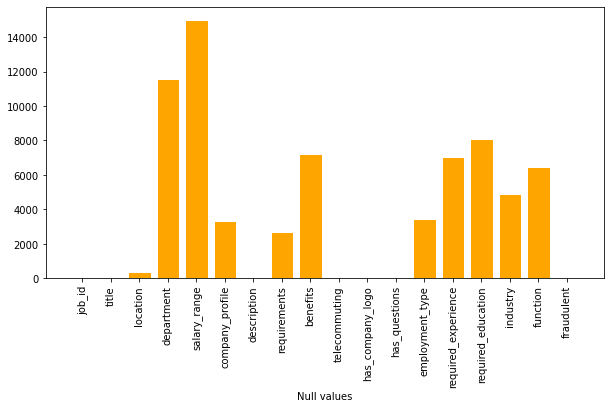

In [ ]:
nullval = jobdf.isnull().sum()
plt.figure(figsize=(10,5))
plt.bar(jobdf.columns,nullval,color = 'orange', edgecolor = 'white')
plt.xlabel('Null values')
plt.xticks(rotation='vertical')
plt.show()

Same chart but horizontal

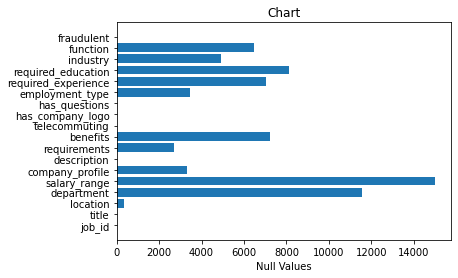

In [ ]:
#plt.rcdefaults()
fig, ax = plt.subplots()
#plt.figure(figsize=(25,10))
ax.barh(jobdf.columns, nullval, align = 'center')
#ax.set_yticks(np.arange(mydf.columns))

#ax.invert_yaxes()
ax.set_xlabel('Null Values')
ax.set_title('Chart')
plt.show()



In [ ]:
jobdf['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

In [ ]:
val = jobdf['required_education'].astype(str)

#Seaborn countplot showing most desired required education in job adverts.

Text(0.5, 0, 'Required Education')

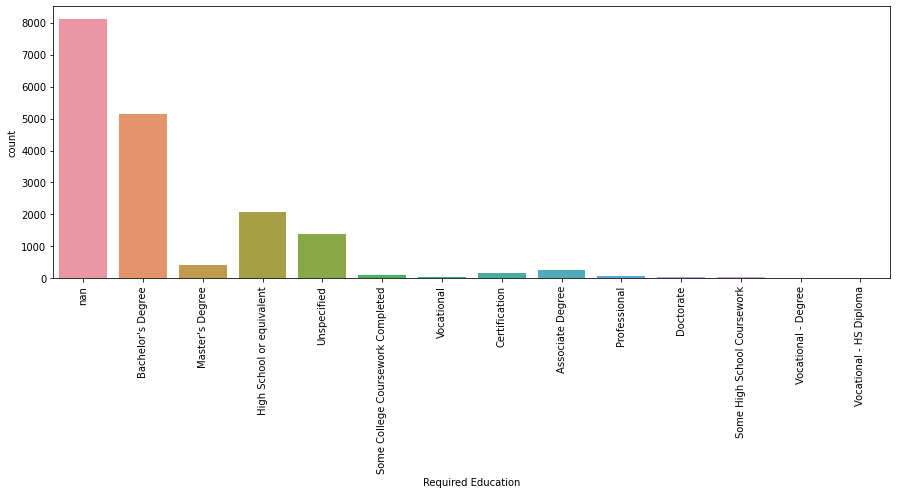

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=jobdf['required_education'].astype(str), data=jobdf['required_education'])
plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel('Required Education')

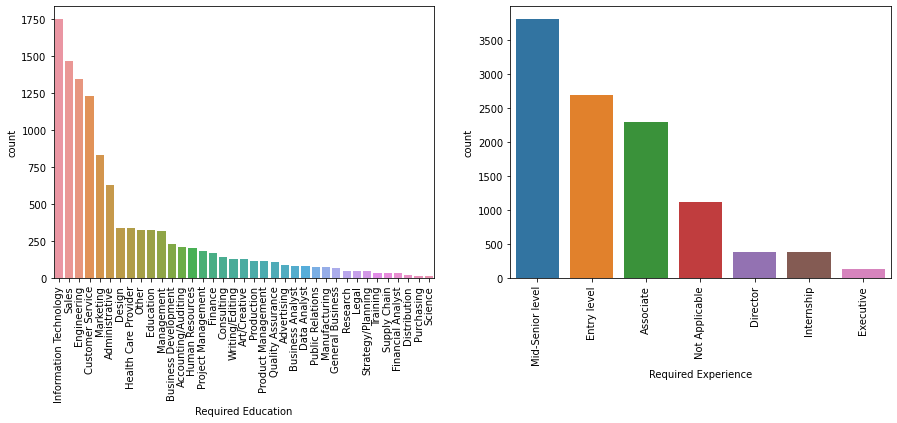

In [ ]:
plt.figure(figsize=(15,5))
fig1 = plt.subplot(1,2,1)
ax1 = sns.countplot(x=jobdf['function'].astype(str), data=jobdf, order = jobdf['function'].value_counts().index)
plt.setp(ax1.get_xticklabels(), rotation=90)
plt.xlabel('Required Education')

fig2 = plt.subplot(1,2,2)
ax2 = sns.countplot(x=jobdf['required_experience'].astype(str), data=jobdf['required_experience'], order = jobdf['required_experience'].value_counts().index)
plt.setp(ax2.get_xticklabels(), rotation = 90)
plt.xlabel('Required Experience')

plt.show()


#Trial

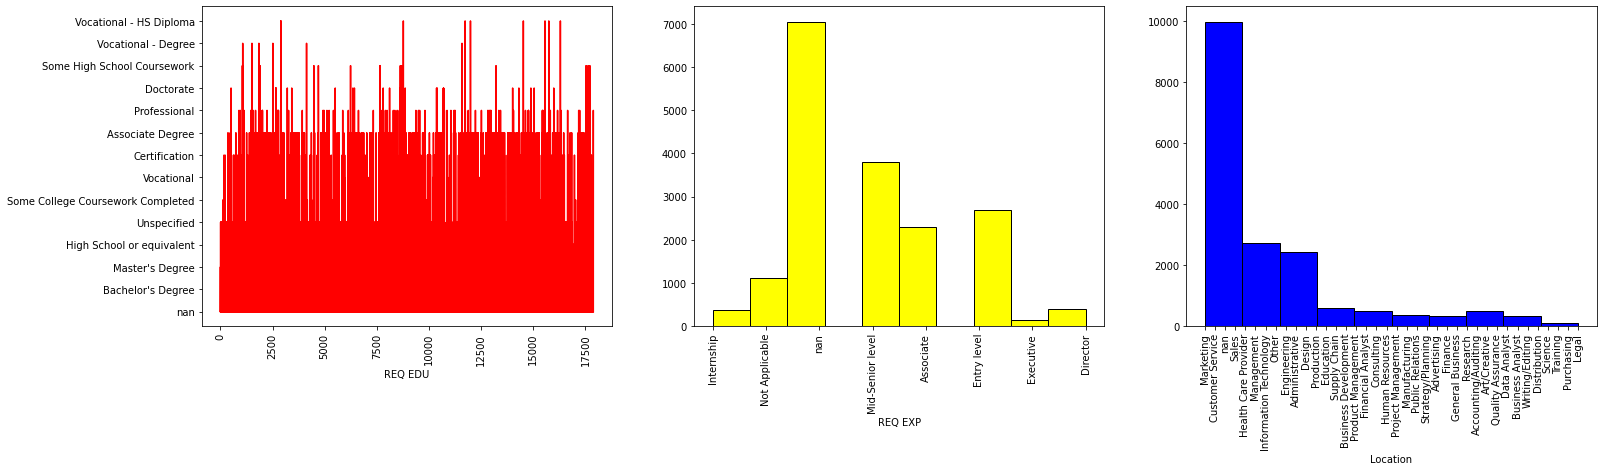

In [ ]:
plt.figure(figsize=(25,20))
plt.subplot(3,3,1)
plt.plot(jobdf['required_education'].astype(str), color = 'red')
plt.xlabel('REQ EDU')
plt.xticks(rotation='vertical')

plt.subplot(3,3,2)
plt.hist(jobdf['required_experience'].astype(str), color = 'yellow', edgecolor = 'black', )
plt.xlabel('REQ EXP')
plt.xticks(rotation='vertical')

plt.subplot(3,3,3)
plt.hist(jobdf['function'].astype(str), color = 'blue', edgecolor = 'black', )
plt.xlabel('Location')
plt.xticks(rotation='vertical')


plt.show()

#Finding word length count of job description feature

In [ ]:
#print(mydf['required_education'].unique())
function = lambda x:len(x.split(' '))
len_desc = jobdf['description'].astype(str).apply(function)
print(len_desc.head())
jobdf['desc_len'] = len_desc

0    124
1    309
2     50
3    345
4    182
Name: description, dtype: int64


In [ ]:
print(jobdf.iloc[jobdf['desc_len'].max()])
print("job advert with maximum word count", jobdf.iloc[jobdf['desc_len'].max()].desc_len)
#jobdf['desc_len'].loc[:,201]

job_id                                                              2075
title                                                    Growth Analyst 
location                                                 EE, 37, Tallinn
department                                                  Development 
salary_range                                                         NaN
company_profile        Want to build a 21st century financial service...
description            TransferWise is the clever new way to move mon...
requirements           So, what’s the role?Essentially, the role is t...
benefits               Apart from a competitive salary and all-expens...
telecommuting                                                          0
has_company_logo                                                       1
has_questions                                                          0
employment_type                                                      NaN
required_experience                                

In [ ]:
jobdf['location'].isna().sum()

346

#Plotting the length of fraud and non_fraud job adverts.

<class 'pandas.core.frame.DataFrame'>


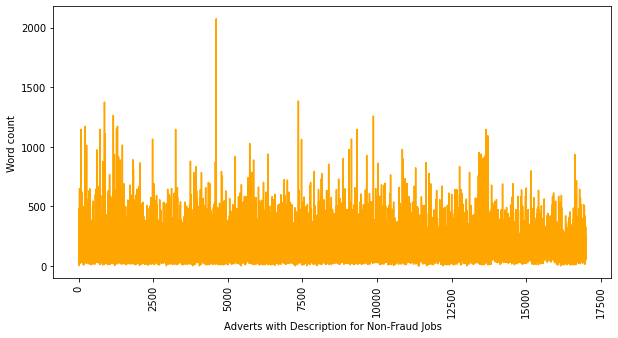

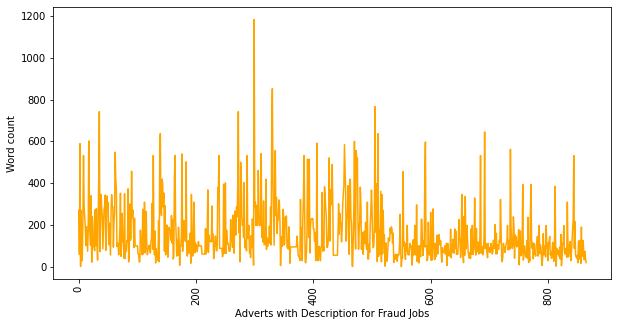

In [ ]:
desc_fraud = pd.DataFrame(jobdf[jobdf['fraudulent']==1].desc_len)
#print(desc_fraud)

desc_nonfraud = pd.DataFrame(jobdf[jobdf['fraudulent']==0].desc_len)
print(type(desc_nonfraud))
desc_fraud.reset_index(drop=True,inplace=True)
desc_nonfraud.reset_index(drop=True,inplace=True)

plt.figure(figsize=(10,5))
plt.plot(desc_nonfraud, color = 'orange')
plt.ylabel('Word count')
plt.xlabel('Adverts with Description for Non-Fraud Jobs')
plt.xticks(rotation='vertical')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(desc_fraud, color = 'orange')
plt.ylabel('Word count')
plt.xlabel('Adverts with Description for Fraud Jobs')
plt.xticks(rotation='vertical')
plt.show()


In [ ]:
a=pd.DataFrame(jobdf[jobdf['fraudulent']==0])
pew = a['desc_len'].max()
print(a[a['desc_len']==a['desc_len'].max()].job_id)

4778    4779
Name: job_id, dtype: int64


#Finding the max value from the desc_len column for non_fraud jobs

In [ ]:
non_fraud_dataset=pd.DataFrame(jobdf[jobdf['fraudulent']==1])
print(non_fraud_dataset[non_fraud_dataset['desc_len']==non_fraud_dataset['desc_len'].max()].job_id)

#print(jobdf[jobdf['desc_len']==jobdf['desc_len'].max() and jobdf['fraudulent']==0])
print(desc_fraud['desc_len'].max())
#print(jobdf[jobdf['job_id']==2428])


6575    6576
Name: job_id, dtype: int64
1183


#KEEPING THIS UNEDITED

In [ ]:
print(mydf.loc[mydf['desc_len'].max()])
desc_nonfraud['desc_len'].max()

job_id                                                             14908
title                                               Interactive Designer
location                                                US, NY, Brooklyn
department                                                        Design
salary_range                                                         NaN
company_profile        AREA 17 is an interactive agency. We take an i...
description            We are seeking a full time Interactive Designe...
requirements           Required Skills:2-3 years of design experience...
benefits               Generous Health and Dental PackageMetroCard Pr...
telecommuting                                                          0
has_company_logo                                                       1
has_questions                                                          1
employment_type                                                Full-time
required_experience                                

14907

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


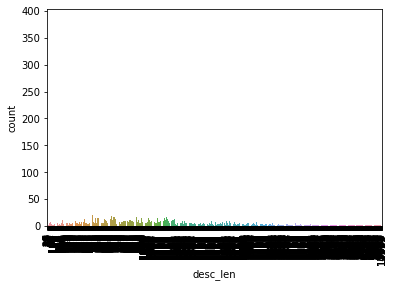

In [ ]:
ax = sns.countplot(desc_fraud,data=mydf)
plt.xticks(rotation='vertical')
plt.show()